In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load Data

In [2]:
import pandas as pd 
import numpy as np
from tqdm import tqdm

In [3]:
% cd '/content/gdrive/MyDrive/MBTI'

/content/gdrive/MyDrive/MBTI


In [4]:
import os
from glob import glob 

data_name_list = glob("*.csv")
data_name_list 
data_dict = {}

for name in data_name_list :
  path = os.path.join(name)
  data = pd.read_csv(path,encoding='cp949', index_col=0)
  data_dict[str(name[0:4])] = data 

print(f'Succesfully loaded {len(data_dict)} data')

Succesfully loaded 16 data


In [5]:
data_dict['ESTJ'].head()

,num,title,content
1,4,ESTJ갤러리,-
2,7,아따잉 첫빠여라~~ ㅋㅋ,반갑소잉~~<U+00A0>
3,9,여긴 왜 사람이 없냐,존나 조용하네
4,10,estj는 인싸들이어서 글쓸시간도없음,근데 나도 estj임
5,11,MBTI 갤러리에서 떡 돌리러 왔습니다.,반갑습니다.


In [6]:
data_dict.keys()

dict_keys(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFP', 'ESFJ', 'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', 'INTP'])

In [7]:
# labeling 
for label in data_dict.keys():
  data_dict[label]['label'] = label 

In [8]:
#checking 
data_dict['ESTJ'].head()

,num,title,content,label
1,4,ESTJ갤러리,-,ESTJ
2,7,아따잉 첫빠여라~~ ㅋㅋ,반갑소잉~~<U+00A0>,ESTJ
3,9,여긴 왜 사람이 없냐,존나 조용하네,ESTJ
4,10,estj는 인싸들이어서 글쓸시간도없음,근데 나도 estj임,ESTJ
5,11,MBTI 갤러리에서 떡 돌리러 왔습니다.,반갑습니다.,ESTJ


In [9]:
# contcat intto one data_set 
result = pd.DataFrame()
for label in data_dict.keys():
  result = pd.concat([result, data_dict[label]])

result = result.drop('num', axis=1)
result = result.reset_index().drop(['index'],axis=1)

In [10]:
result

,title,content,label
0,사랑해요 엔프제,천사가 있다면 당신일 것<U+00A0>,ENFJ
1,ㅎㅇ,너희들 다 내 거임,ENFJ
2,엔프제 갤러리 특),엔프제는 없고엔프제를 보려는 관객만 있다,ENFJ
3,갤주는 갤이름 대문자로 바꿔라. ㅈㄴ 불편하네,NaN,ENFJ
4,ㅎㅇㅎㅇ,엔갤 흥하길 바람,ENFJ
...,...,...,...
28237,응애 나 아기인팁,응애,INTP
28238,인팁은 악필이냐?,일단 난 악필임,INTP
28239,이제 깨달았다,최근에 mbti 검사해보고 계속 infp 나와서 가끔씩 infp 관련된 거 찾아봤는...,INTP
28240,와시발 턱걸이,- dc official App,INTP


In [11]:
print(f'result shape : {result.shape}')

result shape : (28242, 3)


## Preprocessing

Basic
기초적인 전처리,
html tag 제거(크롤링한 데이터일경우)
숫자, 영어, 특수문자 등 필요하지 않은 언어 제거
Lowercasing
"@%*=()/+ 와 같은 punctuation(문장부호) 제거


출처: https://ebbnflow.tistory.com/246 [Dev Log : 삶은 확률의 구름]


In [ ]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }


In [ ]:
def clean_punc(text, punct, mapping): 
  for p in mapping: 
    text = text.replace(p, mapping[p]) 

  for p in punct:
     text = text.replace(p, '') 

  specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''} 
  for s in specials: 
    text = text.replace(s, specials[s]) 

  return text.strip()


In [ ]:
# try clean punc 
sample_text = result.iloc[0,1] 
sample_text

'         천사가 있다면 당신일 것<U+00A0>        '

In [ ]:
clean_punc(sample_text ,punct, punct_mapping)

'천사가 있다면 당신일 것U00A0'

In [ ]:
import re 

def clean_text(texts): 
  corpus = [] 
  for i in range(0, len(texts)): 
    review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation 
    review = re.sub(r'\d+','', str(texts[i]))# remove number
    review = review.lower() #lower case 
    review = re.sub(r'\s+', ' ', review) #remove extra space 
    review = re.sub(r'<[^>]+>','',review) #remove Html tags 
    review = re.sub(r'\s+', ' ', review) #remove spaces 
    review = re.sub(r"^\s+", '', review) #remove space from start 
    review = re.sub(r'\s+$', '', review) #remove space from the end 
    corpus.append(review) 


  
  return corpus



In [ ]:
clean_text(sample_text)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '천',
 '사',
 '가',
 '',
 '있',
 '다',
 '면',
 '',
 '당',
 '신',
 '일',
 '',
 '것',
 '<',
 'u',
 '+',
 '',
 '',
 'a',
 '',
 '>',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

### SOYNLP를 이용한 단어 토큰화

In [13]:
!pip install soynlp

     |████████████████████████████████| 419kB 3.9MB/s 


In [14]:
from soynlp.tokenizer import LTokenizer
from soynlp.tokenizer import MaxScoreTokenizer
from soynlp.normalizer import *

## 레이블 인코딩

In [17]:
# 레이블 인코딩

from sklearn.preprocessing import LabelEncoder

mydata = result.dropna()
encoder = LabelEncoder()
encoder.fit(mydata['label'])
mydata['label'] = encoder.transform(mydata['label'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
mydata['content'].values

array(['         천사가 있다면 당신일 것<U+00A0>        ', '너희들 다 내 거임',
       '엔프제는 없고엔프제를 보려는 관객만 있다', ...,
       '최근에 mbti 검사해보고 계속 infp 나와서 가끔씩 infp 관련된 거 찾아봤는데 뭔가 조금씩 다른거 같고, infp인 애들 역겹게 느껴진다 싶었는데 돌이켜보니 나는 intp가 맞는 거 같다. 그냥 인간관계에서만 f인척하는데 그게 반영됐던 거 같아.',
       ' - dc official App', '패턴 우려먹기 많이 보이네'], dtype=object)

In [19]:
mydata['label'].values

array([ 0,  0,  0, ..., 11, 11, 11])

## GPU 문제로 인한 , 케라스 활용

### 1)기본적인 임베딩 레이어를 거친 MLP 

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [21]:
maxlen = 100
training_samples = 10000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)

In [22]:
tokenizer.fit_on_texts(mydata['content'].values)

In [23]:
sequences = tokenizer.texts_to_sequences(mydata['content'].values)

In [24]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))



Found 202321 unique tokens.


In [25]:
data = pad_sequences(sequences, maxlen=maxlen)

In [27]:
labels = np.asarray(mydata['label'].values)

In [28]:
labels

array([ 0,  0,  0, ..., 11, 11, 11])

In [29]:
print('Shape of data tensor: ', data.shape)
print('Shape of label tensor: ', labels.shape)

Shape of data tensor:  (26645, 100)
Shape of label tensor:  (26645,)


In [30]:
data

array([[   0,    0,    0, ...,   18,    1,    2],
       [   0,    0,    0, ...,    7,    5,  731],
       [   0,    0,    0, ...,    0,  926,  143],
       ...,
       [   0,    0,    0, ...,   78,   22,  105],
       [   0,    0,    0, ...,  688,  710,  655],
       [   0,    0,    0, ..., 6232,   21, 7103]], dtype=int32)

In [45]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels)

In [59]:
data[0:34]

array([[   0,    0,    0, ...,   84, 3776,    6],
       [   0,    0,    0, ..., 6252,    8,  241],
       [   0,    0,    0, ...,  920,  213,   42],
       ...,
       [   0,    0,    0, ...,    0,    0,   93],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,   23, 1097,  889]], dtype=int32)

In [46]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

In [63]:
# build a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Embedding
embedding_dim =100

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='softmax'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
Total params: 1,320,560
Trainable params: 1,320,560
Non-trainable params: 0
_________________________________________________________________


In [64]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))


Epoch 1/10
313/313 [==============================] - 3s 10ms/step - loss: 2.7102 - acc: 0.0954 - val_loss: 2.6767 - val_acc: 0.1021
Epoch 2/10
313/313 [==============================] - 3s 9ms/step - loss: 2.5816 - acc: 0.1586 - val_loss: 2.6475 - val_acc: 0.1111
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 2.3132 - acc: 0.2858 - val_loss: 2.6653 - val_acc: 0.1272
Epoch 4/10
313/313 [==============================] - 3s 9ms/step - loss: 1.9233 - acc: 0.4413 - val_loss: 2.7218 - val_acc: 0.1404
Epoch 5/10
313/313 [==============================] - 3s 9ms/step - loss: 1.5717 - acc: 0.5480 - val_loss: 2.9047 - val_acc: 0.1311
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 1.3026 - acc: 0.6345 - val_loss: 3.0454 - val_acc: 0.1412
Epoch 7/10
313/313 [==============================] - 3s 9ms/step - loss: 1.0992 - acc: 0.6893 - val_loss: 3.3991 - val_acc: 0.1392
Epoch 8/10
313/313 [==============================] - 3s 9ms/step - loss: 0

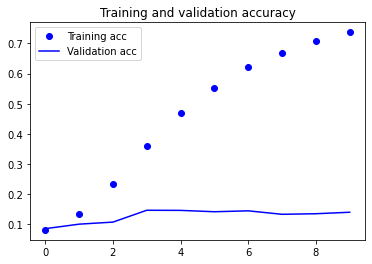

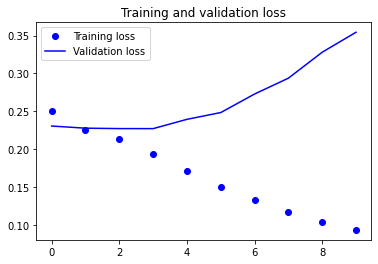

In [53]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### LSTM 사용

In [66]:
# build a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM

embedding_dim = 500

model_LSTM = Sequential()
model_LSTM.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_LSTM.add(LSTM(64,  return_sequences=True))
model_LSTM.add(LSTM(64,return_sequences=True))
model_LSTM.add(LSTM(64,return_sequences=True))
model_LSTM.add(Flatten())
model_LSTM.add(Dense(32, activation='relu'))
model_LSTM.add(Dense(16, activation='softmax'))
model_LSTM.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 500)          5000000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 64)           144640    
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 64)           33024     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 64)           33024     
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                204832    
_________________________________________________________________
dense_11 (Dense)             (None, 16)               

In [67]:
model_LSTM.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_LSTM_history = model_LSTM.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 51s 591ms/step - loss: 2.7151 - acc: 0.0881 - val_loss: 2.6931 - val_acc: 0.0925
Epoch 2/20
63/63 [==============================] - 37s 588ms/step - loss: 2.6784 - acc: 0.1014 - val_loss: 2.6858 - val_acc: 0.1030
Epoch 3/20
63/63 [==============================] - 37s 589ms/step - loss: 2.5675 - acc: 0.1371 - val_loss: 2.7464 - val_acc: 0.0865
Epoch 4/20
63/63 [==============================] - 36s 578ms/step - loss: 2.2958 - acc: 0.2345 - val_loss: 2.9837 - val_acc: 0.1415
Epoch 5/20
63/63 [==============================] - 37s 582ms/step - loss: 1.9892 - acc: 0.3405 - val_loss: 3.3386 - val_acc: 0.1525
Epoch 6/20
63/63 [==============================] - 37s 583ms/step - loss: 1.7582 - acc: 0.4209 - val_loss: 3.7282 - val_acc: 0.1345
Epoch 7/20
63/63 [==============================] - 37s 586ms/step - loss: 1.5718 - acc: 0.4902 - val_loss: 4.2036 - val_acc: 0.1530
Epoch 8/20
63/63 [==============================] - 36s 579ms/step - 

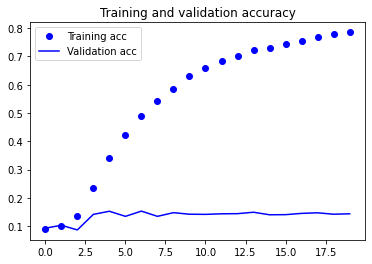

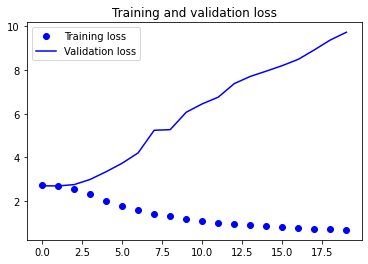

In [68]:
import matplotlib.pyplot as plt

acc = model_LSTM_history.history['acc']
val_acc = model_LSTM_history.history['val_acc']
loss = model_LSTM_history.history['loss']
val_loss = model_LSTM_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


결과는 매우 실망스러움 .....

Kobert로 시도해보자 !

## SKT Kobert 사용

결론적으로 Colab Ram 제한으로 계속해서 실패함.

reference : SKT brain Manual Guidline

https://github.com/aeddung/ML-DL/blob/main/koBert_multiclassification.py


### KoBert dataset 맞게 전처리

In [ ]:
# bert dataset 맞게 변형 

from sklearn.preprocessing import LabelEncoder

mydata = result.dropna()
encoder = LabelEncoder()
encoder.fit(mydata['label'])
mydata['label'] = encoder.transform(mydata['label'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mydata.head()

,title,content,label
0,사랑해요 엔프제,천사가 있다면 당신일 것<U+00A0>,0
1,ㅎㅇ,너희들 다 내 거임,0
2,엔프제 갤러리 특),엔프제는 없고엔프제를 보려는 관객만 있다,0
4,ㅎㅇㅎㅇ,엔갤 흥하길 바람,0
5,엔프제 노무 부러워,니네 성격 나줘ㅡㅡ,0


### Kobert 설치 

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3 # 최신 버전 설치시,  에러 발생
!pip install torch

     |████████████████████████████████| 46.9MB 92kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 348kB 4.0MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595700 sha256=033c6398938e61a066139c38ddac384f6896e90d75bde8182fee5c37d46ca5d9
  Stored in directory: /root/.cache/pip/wheels/37/65/52/63032864a0f31a08b9a88569f803b5bafac8abd207fd7f7534
Successfully built gluonnlp
     |████████████████████████████████| 1.2MB 4.0MB/s 
     |████████████████████████████████| 757kB 3.8MB/s 
     |████████████████████████████████| 3.0MB 24.9MB/s 
     |████████████████████████████████| 901kB 41.6MB/s 


In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-g3o1rwsi
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-g3o1rwsi
  Created wheel for kobert: filename=kobert-0.1.2-cp37-none-any.whl size=12718 sha256=26f67ec7860e42154a082f039479caff9b9bb80fa0237cfc183c4a41b09d660f
  Stored in directory: /tmp/pip-ephem-wheel-cache-7sy2k11c/wheels/a2/b0/41/435ee4e918f91918be41529283c5ff86cd010f02e7525aecf3
Successfully built kobert


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

In [ ]:
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

In [ ]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
!wget https://www.dropbox.com/s/374ftkec978br3d/ratings_train.txt?dl=1
!wget https://www.dropbox.com/s/977gbwh542gdy94/ratings_test.txt?dl=1

--2021-06-15 10:42:18--  https://www.dropbox.com/s/374ftkec978br3d/ratings_train.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/374ftkec978br3d/ratings_train.txt [following]
--2021-06-15 10:42:18--  https://www.dropbox.com/s/dl/374ftkec978br3d/ratings_train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4ff4234e1efeb6d9eec24d8efc.dl.dropboxusercontent.com/cd/0/get/BQeBgQFsn0BinTJQIPKQ2Ps4InozAdDJBCCPFF2t6NcWW-5owcVPUiZstnsLWWm_x1w2ugn1bMQaRbqJXb1n5Ts6mygQg6KBB6hldJCO3YlHvYfXXaqTg9ivRKI2SRfzq0dhmo_FCoMOLggkpDHx7t7Y/file?dl=1# [following]
--2021-06-15 10:42:19--  https://uc4ff4234e1efeb6d9eec24d8efc.dl.dropboxusercontent.com/cd/0/get/BQeBgQFsn0BinTJQIPKQ2Ps4InozAdDJBCCPFF2t6NcWW-5owcVPUiZstnsLWWm_x1w2ugn1b

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device : {device}')
device='cpu'

device : cpu


In [ ]:
bertmodel, vocab = get_pytorch_kobert_model() # Bert model download

[██████████████████████████████████████████████████]
[██████████████████████████████████████████████████]


In [ ]:
vocab

Vocab(size=8002, unk="[UNK]", reserved="['[CLS]', '[SEP]', '[MASK]', '[PAD]']")

## Bert 사용을 위한 전처리

## Train Test Split 

In [ ]:
dataset =  mydata[['content','label']].values

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=16102166)
print("train shape is:", len(train))
print("test shape is:", len(test))

train shape is: 21316
test shape is: 5329


In [ ]:
max(mydata['label'])

15

## Bert Tokenizer 사용 

In [ ]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair) 

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# Setting parameters
max_len = 64 # 해당 길이를 초과하는 단어에 대해선 bert가 학습하지 않음
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

In [ ]:
data_train = BERTDataset(train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(test, 0, 1, tok, max_len, True, False)
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=2)
# data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=16,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
device='cpu'

In [ ]:
model = BERTClassifier(bert = bertmodel,num_classes=16,  dr_rate=0.5).to(device)

In [ ]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [ ]:
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
## Cuda check
print(f'current device : {device}')

current device : cpu


In [ ]:
print(device)
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

cpu


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch 1 batch id 1 loss 2.8141884803771973 train acc 0.09375


# Test 

In [ ]:
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  out = model(token_ids, valid_length, segment_ids)
  print(out)
    
    model.eval() # 평가 모드로 변경
    
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))